In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Input
df = pd.read_csv('csv/spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5) # sample data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1466,ham,Your account has been refilled successfully by...,NaN,NaN,NaN
1138,ham,What * u wearing?,NaN,NaN,NaN
4904,spam,Warner Village 83118 C Colin Farrell in SWAT t...,NaN,NaN,NaN
4666,ham,I send the print outs da.,NaN,NaN,NaN
3144,ham,I.ll get there tomorrow and send it to you,NaN,NaN,NaN


In [4]:
df.shape # number of rows and columns

(5572, 5)

In [5]:
df.info() # dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe() # dataframe description

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


<br>

<hr>

# Project Flow

**1. Data Cleaning**<br>
**2. EDA**<br>
**3. Text Preprocessing**<br>
**4. Model Building**<br>
**5. Evaluation**<br>
**6. Improvements**<br>
**7. Website Deployment**<br>

<br>

# 1. Data Cleaning

### Drop last 3 columns (since there are mostly Null Values)

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
1150,ham,(That said can you text him one more time?)
1517,spam,Our brand new mobile music service is now live...
1902,ham,My sister got placed in birla soft da:-)
3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v..."
4150,ham,ÌÏ comin to fetch us oredi...


### Renaming the columns

In [9]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [10]:
df.sample(5)

,target,text
2109,ham,Lara said she can loan me &lt;#&gt; .
4773,ham,U repeat e instructions again. Wat's e road na...
364,ham,Good afternoon sunshine! How dawns that day ? ...
575,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."
4694,spam,URGENT! Your Mobile No 07808726822 was awarded...


### Encoding ham and spam in target column to 0 and 1 respectively

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Missing values check

In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

### Duplicate vales check

In [15]:
df.duplicated().sum() # shows duplicates comparing both columns

403

### Remove Duplicates

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2. EDA -  Exploratory Data Analysis

### percentage of ham and spam texts

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

653 texts are spam<br>
4516 texts are not spam

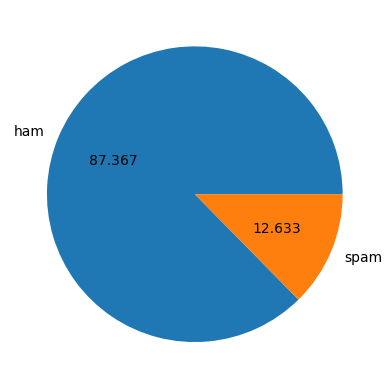

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.3f')
plt.show()

12.633% texts are spam<br>
87.367% texts are not spam

**Note: Data is imbalanced**

### Adding column having number of characters, number of words, numner of sentences in text

In [21]:
import nltk # natural language toolkit

In [22]:
# nltk.download('punkt') # dependencies

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


### ham messages

In [29]:
df[df['target'] == 0] 

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [30]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


### spam messages

In [31]:
df[df['target'] == 1] 

,target,text,num_characters,num_words,num_sentences
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1


In [32]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


 **Note:** mean of num_characters of ham messages is less than that of spam messages and similarly for others. From this we get to know that spam messages are bigger in length than ham messages

In [33]:
import seaborn as sns

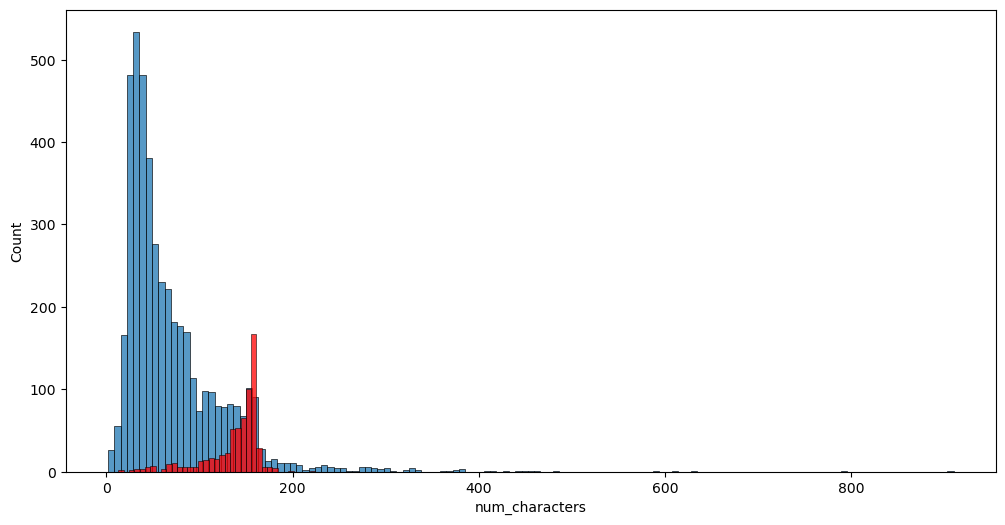

In [34]:
plt.figure(figsize=(12,6))
# ham
sns.histplot(df[df['target'] == 0]['num_characters'])
# spam
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
plt.show()

**num_characters used in ham are less than spam messages**

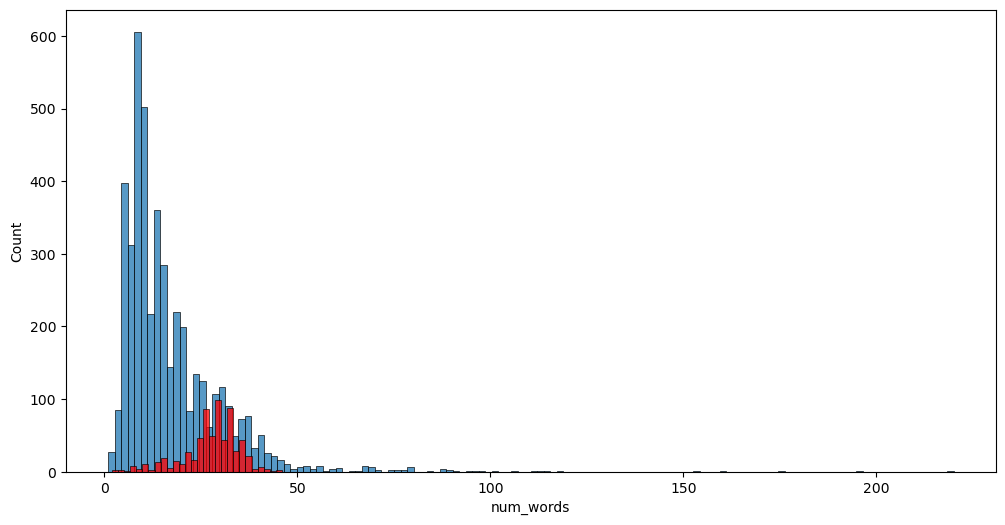

In [35]:
plt.figure(figsize=(12,6))
# ham
sns.histplot(df[df['target'] == 0]['num_words'])
# spam
sns.histplot(df[df['target'] == 1]['num_words'], color='red')
plt.show()

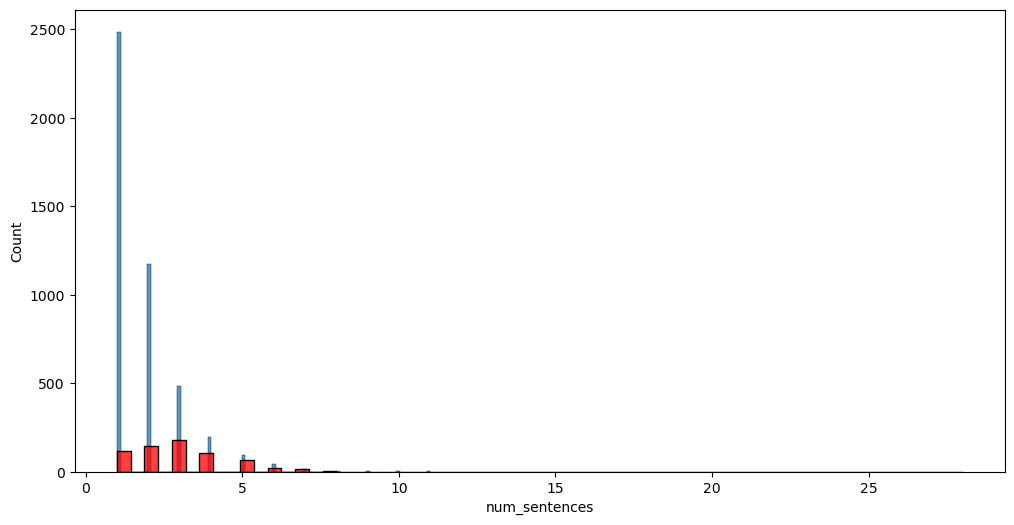

In [36]:
plt.figure(figsize=(12,6))
# ham
sns.histplot(df[df['target'] == 0]['num_sentences'])
# spam
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')
plt.show()

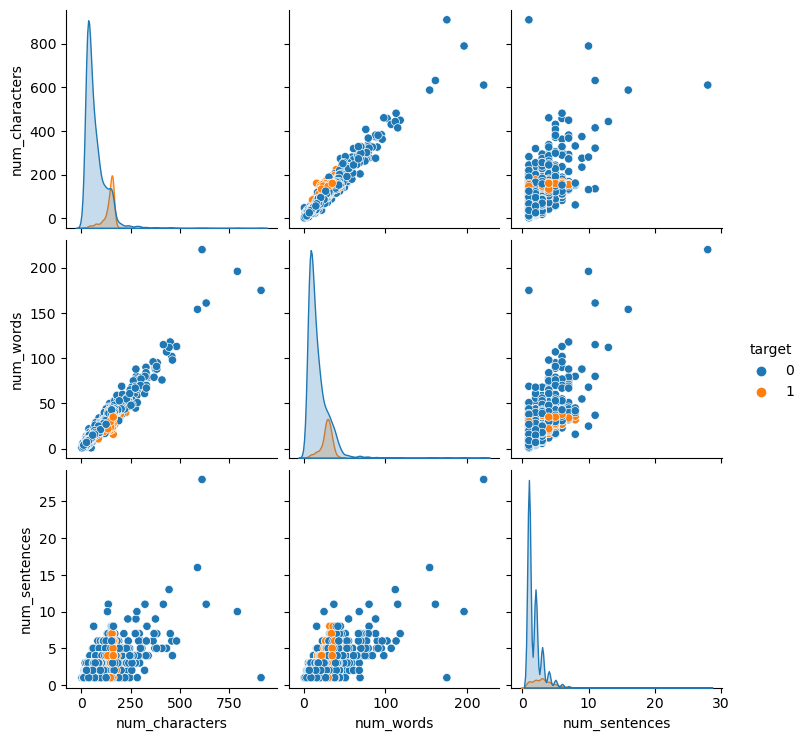

In [37]:
sns.pairplot(df, hue='target')
plt.show()

In [38]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


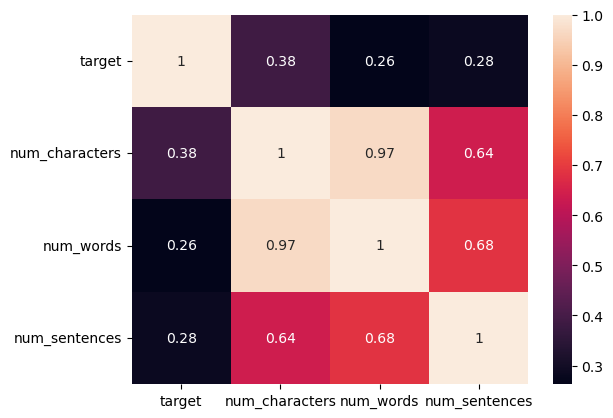

In [39]:
sns.heatmap(df.corr(), annot=True)
plt.show()

**Note:** From these 3 featurs we can only take 1 feature which has high correlation with target. So, we choose num_characters

# 3. Data Preprocessing
<li> Lower case
<li> Tokenization
<li> Removing special characters
<li> Removing stop words and punctuation
<li> Stemming

In [40]:
from nltk.corpus import stopwords

In [41]:
stopwords.words('english') # these words are only used in sentence formation, and does not contribute in meaning of sentence

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# it brings words to its root form

In [45]:
def transform_text(text):
    text = text.lower() # lowercase text
    text = nltk.word_tokenize(text) # to split text into list of words
    
    y = []
    for i in text:
        if i.isalnum(): # to remove special characters (to keep alpha numeric characters)
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [46]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [47]:
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='black')

In [50]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

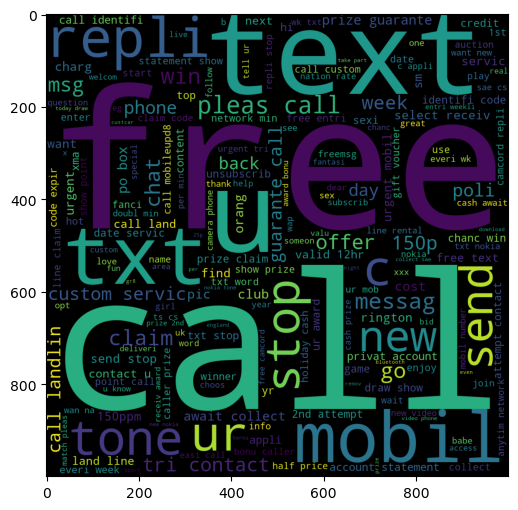

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

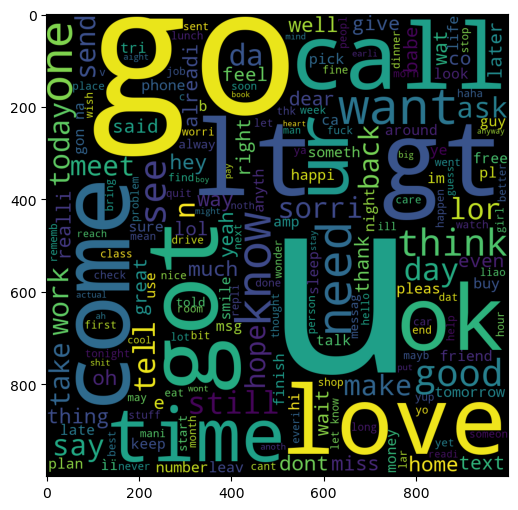

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

**Top 30 words**

In [54]:
# spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

In [56]:
from collections import Counter

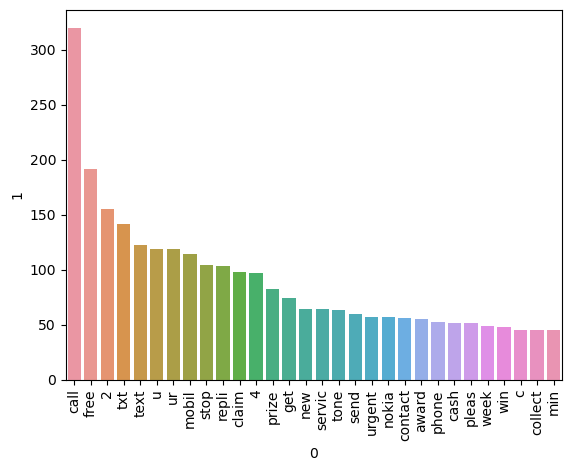

In [57]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35394

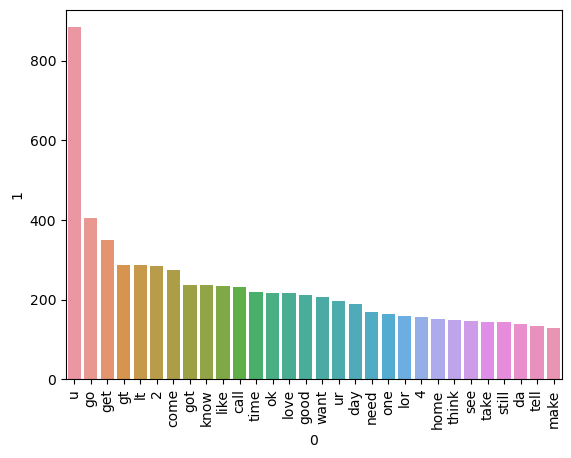

In [60]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

We will start from Naive Bayes Algorithm as starting point

Text Data needs to be converted into Numerical Data, so we vectorize it. (Starting with bag of words)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

### using CountVectorizer

In [62]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [63]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
X.shape

(5169, 6708)

In [65]:
y = df['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [72]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [73]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


From this we get to know that BernoulliNB has high accuracy_score and high precision_score

### using TfidfVectorizer

In [74]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [75]:
y = df['target'].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [79]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [80]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


From this we get to know that BernoulliNB has high accuracy_score but low precision_score

and MultinomialNB has high precision_score but low accuracy_score

Since data is imbalanced precision_score matters most

So we will go with MultinomialNB with tfidf

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [83]:
clfs = {
    'SVC' : svc,
    'KN'  : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [84]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [85]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print(f'For {name}')
    print(f'Accuracy = {current_accuracy}')
    print(f'Precision = {current_precision}')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy = 0.9758220502901354
Precision = 0.9747899159663865
For KN
Accuracy = 0.9052224371373307
Precision = 1.0
For NB
Accuracy = 0.9709864603481625
Precision = 1.0
For DT
Accuracy = 0.9274661508704062
Precision = 0.8118811881188119
For LR
Accuracy = 0.9584139264990329
Precision = 0.9702970297029703
For RF
Accuracy = 0.9748549323017408
Precision = 0.9827586206896551
For AdaBoost
Accuracy = 0.960348162475822
Precision = 0.9292035398230089
For BgC
Accuracy = 0.9574468085106383
Precision = 0.8671875
For ETC
Accuracy = 0.9748549323017408
Precision = 0.9745762711864406
For GBDT
Accuracy = 0.9477756286266924
Precision = 0.92
For xgb
Accuracy = 0.971953578336557
Precision = 0.943089430894309


In [86]:
performance_df = pd.DataFrame({
                                'Algorithm': clfs.keys(),
                                'Accuracy' : accuracy_scores,
                                'Precision' : precision_scores
}).sort_values(by=['Precision', 'Accuracy'], ascending=False)

In [87]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.970986,1.000000
1,KN,0.905222,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [88]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [89]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.970986
1,KN,Accuracy,0.905222
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


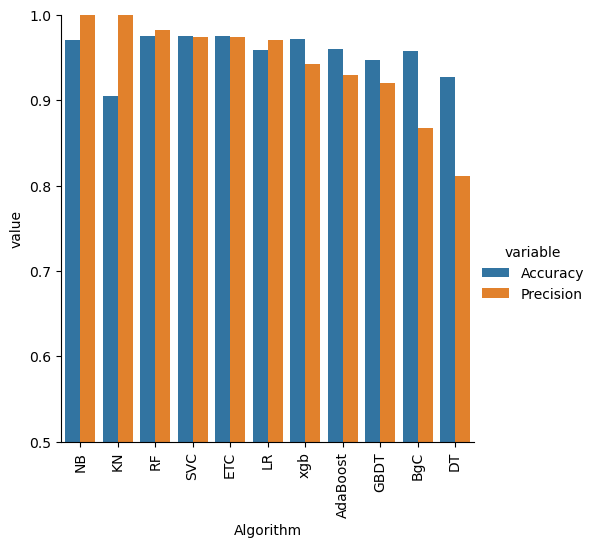

In [90]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# Model Improvement

Change the max_features parameter of Tfidf

At starting in TfidfVectorizer I didn't provided max_features (which was taking all the words to vectorize), but to improve model I took max_features = 3000, restricted max no. of words.

In [91]:
temp_df = pd.DataFrame({
    'Algorithm' : clfs.keys(),
    'Accuracy_max_ft_3000' : accuracy_scores,
    'Precision_max_ft_3000' : precision_scores
})

In [92]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.970986,1.000000,0.970986,1.000000
1,KN,0.905222,1.000000,0.905222,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188


Naive Bayes Algorithm has high Precision Value after taking max_features=3000, so I will go with Naive Bayes NB

# Final Training

also recheck and rerun model building basics as X, y, train_test_split

In [93]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


# Pipeline Creation into Pickle file

In [94]:
import pickle

In [95]:
# pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# pickle.dump(mnb, open('model.pkl', 'wb'))

To create pickle file umcomment above lines